In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('new_data.csv')
data.head()

,Unnamed: 0,label,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_amt_ma,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month
0,0,0,5.613128,8.028504,260.13,1.386294,1539.0,3.135494,3078.0,1539.0,7.50,1.386294,3.135494,3078.0,1539.0,7.50,2.639057,6.0,0.0,2.431418,2.583998,7
1,1,1,6.570883,9.403169,3691.26,2.890372,4617.5,0.693147,5787.0,3655.0,61.04,1.098612,0.693147,5787.0,3650.5,61.04,2.639057,12.0,0.0,0.693147,0.693147,8
2,2,1,6.285998,7.244228,900.13,1.609438,1539.0,0.693147,1539.0,1539.0,66.32,1.098612,0.693147,1539.0,1539.0,66.32,2.079442,6.0,0.0,0.693147,0.693147,8
3,3,1,5.493061,3.145358,159.42,2.890372,947.0,0.693147,0.0,0.0,0.00,1.098612,0.693147,947.0,947.0,2.50,2.639057,6.0,0.0,0.693147,0.693147,6
4,4,1,6.855409,5.027947,1098.90,1.791759,2309.0,1.386294,20029.0,2309.0,29.00,2.302585,1.386294,23496.0,2888.0,35.00,3.784190,6.0,0.0,1.466337,1.466337,6


In [3]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
#SPLITTING DATA INTO INPUT AND OUTPUT
X = data.drop('label',axis=1)
y= data['label']

In [5]:
#scaling the inputs
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_sc = pd.DataFrame(X_sc)

# LOGISTIC REGRESSION

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.33,random_state=1)
X_train_sc,X_test_sc,y_train,y_test = train_test_split(X_sc,y,test_size=.33,random_state=1)

#### IMP NOTE = Our data is highly imbalanced, so accuracy score will not be our main performance metrics to evaluate, as it will surely gives us better accuracy score due to the biasness of class value 1. And cross val score will also show the biased results due to the imbalanced data. Our major focus will be on percision score , recall score and f1 score.

In [8]:
log_class1 = LogisticRegression()

#### applying hyper parameter tuning

In [9]:
grid_param = {'C':10.0**np.arange(-3,3),'penalty':['l1','l2']}
cv = KFold(n_splits=5,shuffle=False,random_state=None)

In [10]:
clf = GridSearchCV(log_class1,grid_param,cv=cv,n_jobs=-1,scoring='f1_macro')

In [11]:
#training 
clf.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [12]:
clf.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [13]:
#1st model 
log_class1 = LogisticRegression(penalty='l2',C=0.1)

training1 = log_class1.fit(X_train,y_train)
pred1 = log_class1.predict(X_test)
CM1 = confusion_matrix(y_test,pred1)
CR1 = classification_report(y_test,pred1)
acc1 = accuracy_score(y_test,pred1)

print('confision metris :', '\n', CM1)
print('classification report ', '\n', CR1)
print('accuracy score: ', '\n' , acc1)

confision metris : 
 [[   29  8554]
 [   30 60553]]
classification report  
               precision    recall  f1-score   support

           0       0.49      0.00      0.01      8583
           1       0.88      1.00      0.93     60583

    accuracy                           0.88     69166
   macro avg       0.68      0.50      0.47     69166
weighted avg       0.83      0.88      0.82     69166

accuracy score:  
 0.8758927796894428


#### Logistic regression is giving us completely biased redults, we will try with scaled values if the results get better or not

In [14]:
clf.fit(X_train_sc,y_train)
clf.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [15]:
#2st model 
log_class2 = LogisticRegression(C=1.0,penalty='l2')
training2 = log_class2.fit(X_train_sc,y_train)
pred2 = log_class2.predict(X_test_sc)
CM2 = confusion_matrix(y_test,pred2)
CR2 = classification_report(y_test,pred2)
acc2 = accuracy_score(y_test,pred2)

print('confision metris :', '\n', CM2)
print('classification report ', '\n', CR2)
print('accuracy score: ', '\n' , acc2)

confision metris : 
 [[ 1454  7129]
 [  867 59716]]
classification report  
               precision    recall  f1-score   support

           0       0.63      0.17      0.27      8583
           1       0.89      0.99      0.94     60583

    accuracy                           0.88     69166
   macro avg       0.76      0.58      0.60     69166
weighted avg       0.86      0.88      0.85     69166

accuracy score:  
 0.8843940664488332


#### with scaled value we can see that the model performance is increasing,  F1 score for class 0 increased from 1% to 27%

### now lets try building a model using sampling technique

In [16]:
from imblearn.over_sampling import RandomOverSampler

In [17]:
from collections import Counter
Counter(y_train)

Counter({1: 122848, 0: 17579})

In [18]:
os = RandomOverSampler(.4)
X_train_sc_os,y_train_os = os.fit_sample(X_train_sc,y_train)
print(' the number of classes before sampling{}'.format(Counter(y_train)))
print(' the number of classes after sampling{}'.format(Counter(y_train_os)))

 the number of classes before samplingCounter({1: 122848, 0: 17579})
 the number of classes after samplingCounter({1: 122848, 0: 49139})


In [19]:
training3 = log_class2.fit(X_train_sc_os,y_train_os)
pred3 = log_class2.predict(X_test_sc)
CM3 = confusion_matrix(y_test,pred3)
CR3 = classification_report(y_test,pred3)
acc3 = accuracy_score(y_test,pred3)

print('confision metris :', '\n', CM3)
print('classification report ', '\n', CR3)
print('accuracy score: ', '\n' , acc3)

confision metris : 
 [[ 5119  3464]
 [ 7003 53580]]
classification report  
               precision    recall  f1-score   support

           0       0.42      0.60      0.49      8583
           1       0.94      0.88      0.91     60583

    accuracy                           0.85     69166
   macro avg       0.68      0.74      0.70     69166
weighted avg       0.88      0.85      0.86     69166

accuracy score:  
 0.8486684209004424


#### with scaled values and over sampling technique we are able to increase the F1 score of class 0, however thier is a decrease in the F1 score of class0. But Looking at the model performance we are getting better results with over sampling technique

### building aoc_roc curve

In [20]:
from sklearn.metrics import roc_auc_score,roc_curve
y_pred_prob = log_class2.predict_proba(X_test_sc)

In [21]:
#fpr = false positive rate
#tpr = true positive rate
#thresholds we set

fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob[:,1])
roc_auc = roc_auc_score(y_test,y_pred_prob[:,1])

ROC AUC = 0.8466423110659107


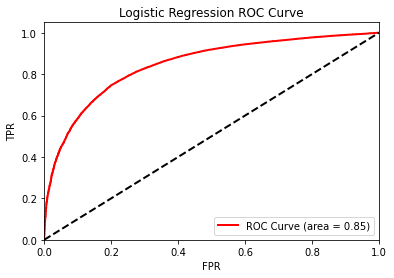

In [22]:
print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='red',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='black',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc='lower right')
plt.show()

# RANDOM FOREST

In [23]:
#training data set using random forest without any hyper parameter tuning
from sklearn.ensemble import RandomForestClassifier

#### building model with normal data without any hyper parameter tuning.

In [24]:
rf_class1 = RandomForestClassifier()
rf_model1 = rf_class1.fit(X_train,y_train)
rf_pred1 = rf_class1.predict(X_test)
rf_CM1 = confusion_matrix(y_test,rf_pred1)
rf_CR1 = classification_report(y_test,rf_pred1)
rf_acc1 = accuracy_score(y_test,rf_pred1)

print('confision metris :', '\n', rf_CM1)
print('classification report ', '\n', rf_CR1)
print('accuracy score: ', '\n' , rf_acc1)

confision metris : 
 [[ 3990  4593]
 [ 1312 59271]]
classification report  
               precision    recall  f1-score   support

           0       0.75      0.46      0.57      8583
           1       0.93      0.98      0.95     60583

    accuracy                           0.91     69166
   macro avg       0.84      0.72      0.76     69166
weighted avg       0.91      0.91      0.91     69166

accuracy score:  
 0.9146256831391146


#### with using random forest classifier we are getting better model performance than of the Logistic regression. lets check model performance with applying hyper parameter tuning.

In [25]:
# RandomForestClassifier()
grid_param = {'criterion':['gini','entropy'],'max_features':['auto', 'sqrt', 'log2']}
cv = KFold(n_splits=3,shuffle=False,random_state=None)

In [26]:
rf_clf = GridSearchCV(RandomForestClassifier(),grid_param,cv=cv,n_jobs=-1,scoring='f1_weighted')

In [27]:
rf_clf.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='f1_weighted')

In [28]:
rf_clf.best_params_

{'criterion': 'gini', 'max_features': 'auto'}

In [29]:
rf_class2 = RandomForestClassifier(criterion='gini',max_features='auto')
rf_model2 = rf_class2.fit(X_train,y_train)
rf_pred2 = rf_class2.predict(X_test)
rf_CM2 = confusion_matrix(y_test,rf_pred2)
rf_CR2 = classification_report(y_test,rf_pred2)
rf_acc2 = accuracy_score(y_test,rf_pred2)

print('confision metris :', '\n', rf_CM2)
print('classification report ', '\n', rf_CR2)
print('accuracy score: ', '\n' , rf_acc2)

confision metris : 
 [[ 3967  4616]
 [ 1309 59274]]
classification report  
               precision    recall  f1-score   support

           0       0.75      0.46      0.57      8583
           1       0.93      0.98      0.95     60583

    accuracy                           0.91     69166
   macro avg       0.84      0.72      0.76     69166
weighted avg       0.91      0.91      0.91     69166

accuracy score:  
 0.9143365237255299


#### with hyper parameter tuning we see no diff in model performance, however there are difference in the confusion matrix, but the overall score is same

### Building a random forest classifier model using over sampling technique

In [30]:
#trying with over sampling
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
Counter(y_train)

Counter({1: 122848, 0: 17579})

In [31]:
os = RandomOverSampler(.4)
X_train_os,y_train_os = os.fit_sample(X_train,y_train)
print(' the number of classes before sampling{}'.format(Counter(y_train)))
print(' the number of classes after sampling{}'.format(Counter(y_train_os)))

 the number of classes before samplingCounter({1: 122848, 0: 17579})
 the number of classes after samplingCounter({1: 122848, 0: 49139})


In [32]:
rf_model3 = rf_class2.fit(X_train_os,y_train_os)
rf_pred3 = rf_class2.predict(X_test)
rf_CM3 = confusion_matrix(y_test,rf_pred3)
rf_CR3 = classification_report(y_test,rf_pred3)
rf_acc3 = accuracy_score(y_test,rf_pred3)

print('confision metris :', '\n', rf_CM3)
print('classification report ', '\n', rf_CR3)
print('accuracy score: ', '\n' , rf_acc3)

confision metris : 
 [[ 4461  4122]
 [ 1899 58684]]
classification report  
               precision    recall  f1-score   support

           0       0.70      0.52      0.60      8583
           1       0.93      0.97      0.95     60583

    accuracy                           0.91     69166
   macro avg       0.82      0.74      0.77     69166
weighted avg       0.91      0.91      0.91     69166

accuracy score:  
 0.9129485585403233


#### using sampling technique we are getting better results, even with unbalanced data we are able to train class 0 very well.

### ROC_AUC curve RANDOM FOREST

In [33]:
rf_prob_pred = rf_class2.predict_proba(X_test)

ROC AUC = 0.9100461379871714


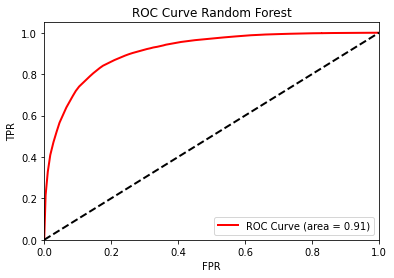

In [34]:
#fpr = false positive rate
#tpr = true positive rate
#thresholds we set

fpr,tpr,thresholds = roc_curve(y_test,rf_prob_pred[:,1])
roc_auc = roc_auc_score(y_test,rf_prob_pred[:,1])
print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='red',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='black',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve Random Forest')
plt.legend(loc='lower right')
plt.show()

# KNN (K-nearest neighbor)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
#setting grid search parameter for hyper tuning
param={'n_neighbors':np.arange(5,30),'weights':['uniform','distance']}
Knn_clf=GridSearchCV(KNeighborsClassifier(),param,cv=3,scoring='f1_weighted',n_jobs=-1)

In [37]:
Knn_clf.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29]),
                         'weights': ['uniform', 'distance']},
             scoring='f1_weighted')

In [38]:
Knn_clf.best_params_

{'n_neighbors': 19, 'weights': 'distance'}

In [39]:
knn1 = KNeighborsClassifier(n_neighbors=19,weights='distance')
knn_model1 = knn1.fit(X_train,y_train)
knn_pred1 = knn1.predict(X_test)
knn_CM1 = confusion_matrix(y_test,knn_pred1)
knn_CR1 = classification_report(y_test,knn_pred1)
knn_acc1 = accuracy_score(y_test,knn_pred1)

print('confision metris :', '\n', knn_CM1)
print('classification report ', '\n', knn_CR1)
print('accuracy score: ', '\n' , knn_acc1)

confision metris : 
 [[ 3014  5569]
 [ 1712 58871]]
classification report  
               precision    recall  f1-score   support

           0       0.64      0.35      0.45      8583
           1       0.91      0.97      0.94     60583

    accuracy                           0.89     69166
   macro avg       0.78      0.66      0.70     69166
weighted avg       0.88      0.89      0.88     69166

accuracy score:  
 0.8947315154844866


In [40]:
#trying with oversampling data

In [41]:
knn1 = KNeighborsClassifier(n_neighbors=19,weights='distance')
knn_model2 = knn1.fit(X_train_os,y_train_os)
knn_pred2 = knn1.predict(X_test)
knn_CM2 = confusion_matrix(y_test,knn_pred2)
knn_CR2 = classification_report(y_test,knn_pred2)
knn_acc2 = accuracy_score(y_test,knn_pred2)

print('confision metris :', '\n', knn_CM2)
print('classification report ', '\n', knn_CR2)
print('accuracy score: ', '\n' , knn_acc2)

confision metris : 
 [[ 4795  3788]
 [ 6248 54335]]
classification report  
               precision    recall  f1-score   support

           0       0.43      0.56      0.49      8583
           1       0.93      0.90      0.92     60583

    accuracy                           0.85     69166
   macro avg       0.68      0.73      0.70     69166
weighted avg       0.87      0.85      0.86     69166

accuracy score:  
 0.854899806263193


#### with K nearest neighbor we see that the model performance is better than the Logistic regression but not as good as Random Forest classifier.

# DECISION TREE

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [43]:
#grid param for grid search cv
param={'max_depth':np.arange(1,50),'criterion':['entropy','gini'],'min_samples_leaf':np.arange(3,20),'max_features':["auto", "sqrt", "log2"]}
dt_clf=RandomizedSearchCV(DecisionTreeClassifier(),param,cv=3,scoring='f1_weighted')

In [44]:
dt_clf.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])},
                   scoring='f1_weighted')

In [45]:
dt_clf.best_params_

{'min_samples_leaf': 19,
 'max_features': 'auto',
 'max_depth': 38,
 'criterion': 'gini'}

In [45]:
#building model
dt1 = DecisionTreeClassifier(min_samples_leaf=19,max_features='auto',max_depth=38,criterion='gini')
dt_model1 = dt1.fit(X_train,y_train)
dt_pred1 = dt1.predict(X_test)
dt_CM1 = confusion_matrix(y_test,dt_pred1)
dt_CR1 = classification_report(y_test,dt_pred1)
dt_acc1 = accuracy_score(y_test,dt_pred1)

print('confision metris :', '\n', dt_CM1)
print('classification report ', '\n', dt_CR1)
print('accuracy score: ', '\n' , dt_acc1)

confision metris : 
 [[ 3796  4787]
 [ 1847 58736]]
classification report  
               precision    recall  f1-score   support

           0       0.67      0.44      0.53      8583
           1       0.92      0.97      0.95     60583

    accuracy                           0.90     69166
   macro avg       0.80      0.71      0.74     69166
weighted avg       0.89      0.90      0.90     69166

accuracy score:  
 0.904085822513952


In [46]:
#building model with scaled values.
dt_clf.fit(X_train_sc,y_train)
dt_clf.best_params_

{'min_samples_leaf': 19,
 'max_features': 'log2',
 'max_depth': 22,
 'criterion': 'gini'}

In [47]:
#model with scaled values
dt2 = DecisionTreeClassifier(min_samples_leaf=19,max_features='log2',max_depth=22,criterion='gini')
dt_model2 = dt2.fit(X_train_sc,y_train)
dt_pred2 = dt2.predict(X_test_sc)
dt_CM2 = confusion_matrix(y_test,dt_pred2)
dt_CR2 = classification_report(y_test,dt_pred2)
dt_acc2 = accuracy_score(y_test,dt_pred2)

print('confision metris :', '\n', dt_CM2)
print('classification report ', '\n', dt_CR2)
print('accuracy score: ', '\n' , dt_acc2)

confision metris : 
 [[ 4117  4466]
 [ 1944 58639]]
classification report  
               precision    recall  f1-score   support

           0       0.68      0.48      0.56      8583
           1       0.93      0.97      0.95     60583

    accuracy                           0.91     69166
   macro avg       0.80      0.72      0.76     69166
weighted avg       0.90      0.91      0.90     69166

accuracy score:  
 0.9073244079461007


In [48]:
#model with using over sampling technique
dt3 = DecisionTreeClassifier(min_samples_leaf=16,max_features='auto',max_depth=38,criterion='entropy')
dt_model3 = dt3.fit(X_train_os,y_train_os)
dt_pred3 = dt3.predict(X_test)
dt_CM3 = confusion_matrix(y_test,dt_pred3)
dt_CR3 = classification_report(y_test,dt_pred3)
dt_acc3 = accuracy_score(y_test,dt_pred3)

print('confision metris :', '\n', dt_CM3)
print('classification report ', '\n', dt_CR3)
print('accuracy score: ', '\n' , dt_acc3)

confision metris : 
 [[ 5331  3252]
 [ 6298 54285]]
classification report  
               precision    recall  f1-score   support

           0       0.46      0.62      0.53      8583
           1       0.94      0.90      0.92     60583

    accuracy                           0.86     69166
   macro avg       0.70      0.76      0.72     69166
weighted avg       0.88      0.86      0.87     69166

accuracy score:  
 0.8619263800133014


#### Decision tree model is also working fine with this imbalanced data set without any sampling technique, however it is not giving us better score than of Random Forest Classifier

# Guassian NB

In [49]:
from sklearn.naive_bayes import GaussianNB

In [50]:
gnb = GaussianNB()
gn_model1 = gnb.fit(X_train,y_train)
gn_pred1 = gnb.predict(X_test)

In [51]:
gn_CM1 = confusion_matrix(y_test,gn_pred1)
gn_CR1 = classification_report(y_test,gn_pred1)
gn_acc1 = accuracy_score(y_test,gn_pred1)

print('confision metris :', '\n', gn_CM1)
print('classification report ', '\n', gn_CR1)
print('accuracy score: ', '\n' , gn_acc1)

confision metris : 
 [[ 6493  2090]
 [14581 46002]]
classification report  
               precision    recall  f1-score   support

           0       0.31      0.76      0.44      8583
           1       0.96      0.76      0.85     60583

    accuracy                           0.76     69166
   macro avg       0.63      0.76      0.64     69166
weighted avg       0.88      0.76      0.80     69166

accuracy score:  
 0.7589711708064656


In [52]:
#setting models with their respective parameters for comparison of model performance
LR = LogisticRegression(penalty='l2',C=0.1)
RFC = RandomForestClassifier(criterion='entropy',max_features='auto')
KNN = KNeighborsClassifier(n_neighbors=19,weights='distance')
DT = DecisionTreeClassifier(min_samples_leaf=16,max_features='log2',max_depth=39,criterion='entropy')
GNB = GaussianNB()

In [53]:
models = [LR,RFC,KNN,DT,GNB]
name_of_model=['Logistic Regression','Random Forest Classification','KNearest neighbor','Decision Tree','GaussianNB']

In [54]:
mean_score = []
for model in models:
    cv = KFold(n_splits=5,shuffle=False,random_state=1)
    cross_val = cross_val_score(model,X_train,y_train,cv=cv, scoring='f1_weighted',n_jobs=-1)
    mean_score.append(cross_val.mean())

In [55]:
model_score = pd.DataFrame({})
model_score['name'] = name_of_model
model_score['Mean_score'] = mean_score

model_score

,name,Mean_score
0,Logistic Regression,0.818364
1,Random Forest Classification,0.903008
2,KNearest neighbor,0.879245
3,Decision Tree,0.892754
4,GaussianNB,0.791799


In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

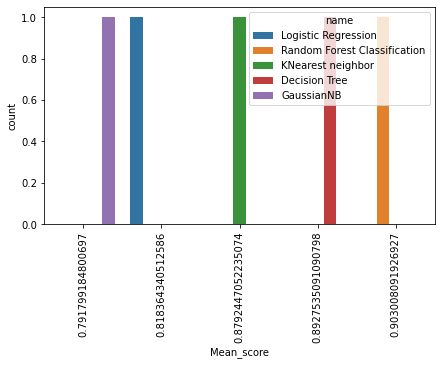

In [74]:
plt.figure(figsize=(7,4))
sns.countplot(x=model_score['Mean_score'],hue=model_score['name'])
plt.xticks(rotation=90)
plt.show()

### from all the models above Random Forest is performing well and giving better F1, percision, recall score. Random forest classifier works well with imbalanced data set my final model will be Random forest with over sampling technique

In [60]:
#final model

rf_model3 = rf_class2.fit(X_train_os,y_train_os)
rf_pred3 = rf_class2.predict(X_test)
rf_CM3 = confusion_matrix(y_test,rf_pred3)
rf_CR3 = classification_report(y_test,rf_pred3)
rf_acc3 = accuracy_score(y_test,rf_pred3)

print('confision metris :', '\n', rf_CM3)
print('classification report ', '\n', rf_CR3)
print('accuracy score: ', '\n' , rf_acc3)

confision metris : 
 [[ 4470  4113]
 [ 1884 58699]]
classification report  
               precision    recall  f1-score   support

           0       0.70      0.52      0.60      8583
           1       0.93      0.97      0.95     60583

    accuracy                           0.91     69166
   macro avg       0.82      0.74      0.77     69166
weighted avg       0.91      0.91      0.91     69166

accuracy score:  
 0.913295549836625


ROC AUC = 0.909733673498488


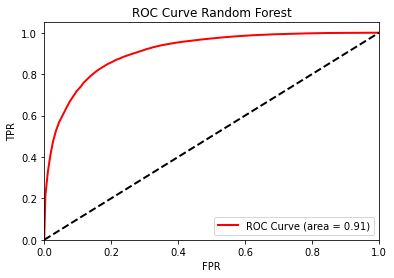

In [61]:
rf_prob_pred = rf_class2.predict_proba(X_test)
#fpr = false positive rate
#tpr = true positive rate
#thresholds we set

fpr,tpr,thresholds = roc_curve(y_test,rf_prob_pred[:,1])
roc_auc = roc_auc_score(y_test,rf_prob_pred[:,1])
print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='red',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='black',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve Random Forest')
plt.legend(loc='lower right')
plt.show()

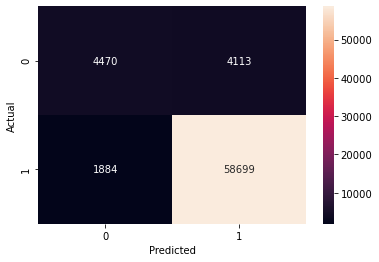

In [78]:
sns.heatmap(rf_CM3,annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [62]:
#saving the model
import joblib
joblib.dump(rf_class2,'microcredit_rfc')

['microcredit_rfc']